# Project Outline

1. Introduction
2. Import required libraries
3. Import the data to the notebook
4. Preprocess data to format it for analysis
5. Generate data visualization for initial evaluation
6. Process data for ML models
7. Develop ML models using gridsearch
8. Test and evaluate ML classifiers using gridsearch parameters
9. Conclusion

# Introduction

For this project, my aim is to use the 'Heart Disease Dataset' to build, evaluate, and compare predictive machine learning models for early-stage heart disease detection. The models will be tuned using GridSearchCV method in order to improve their predictive performance.

# Import Libraries

These are the libraries required for data processing, data visualization, developing ML models, and developing evaluation metrics.

In [41]:
#Importing Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import graphviz


from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

import warnings
warnings.filterwarnings("ignore")

In [2]:
#This is to ensure standard style for any data visualizations
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Import Data

Data Source:
Manu Siddhartha, November 5, 2020, "Heart Disease Dataset (Comprehensive)", IEEE Dataport, doi: https://dx.doi.org/10.21227/dz4t-cm36. <br>
[https://ieee-dataport.org/open-access/heart-disease-dataset-comprehensive]

In [3]:
#Import data from csv file
df = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')

In [4]:
#Preview dataset
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


# Preprocess Data

We will first check if all the data entries we have are complete and appropriate to use.

In [5]:
#Check for null entries
null_count = df.columns.isna().sum()
print("Number of null entries:\n", null_count)

Number of null entries:
 0


In [6]:
#Check for duplicate entries
df = df.drop_duplicates().reset_index(drop=True)
duplicate_count = df.duplicated().sum()
print("Number of duplicate entries:\n", duplicate_count)

Number of duplicate entries:
 0


# Data Visualizations

Before constructing our models, we will conduct an exploratory analysis of our data primarily making inferences based off of data visualizations. This will allow us to see if there are any important correlations we can leverage while developing our classifiers.

In [7]:
#Basic data structure (data types and number of entries)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  918 non-null    int64  
 1   sex                  918 non-null    int64  
 2   chest pain type      918 non-null    int64  
 3   resting bp s         918 non-null    int64  
 4   cholesterol          918 non-null    int64  
 5   fasting blood sugar  918 non-null    int64  
 6   resting ecg          918 non-null    int64  
 7   max heart rate       918 non-null    int64  
 8   exercise angina      918 non-null    int64  
 9   oldpeak              918 non-null    float64
 10  ST slope             918 non-null    int64  
 11  target               918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [8]:
#Summary statistics for the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
sex,918.0,0.789760,0.407701,0.0,1.00,1.0,1.0,1.0
chest pain type,918.0,3.251634,0.931031,1.0,3.00,4.0,4.0,4.0
resting bp s,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
fasting blood sugar,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
resting ecg,918.0,0.603486,0.805968,0.0,0.00,0.0,1.0,2.0
max heart rate,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
exercise angina,918.0,0.404139,0.490992,0.0,0.00,0.0,1.0,1.0
oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2


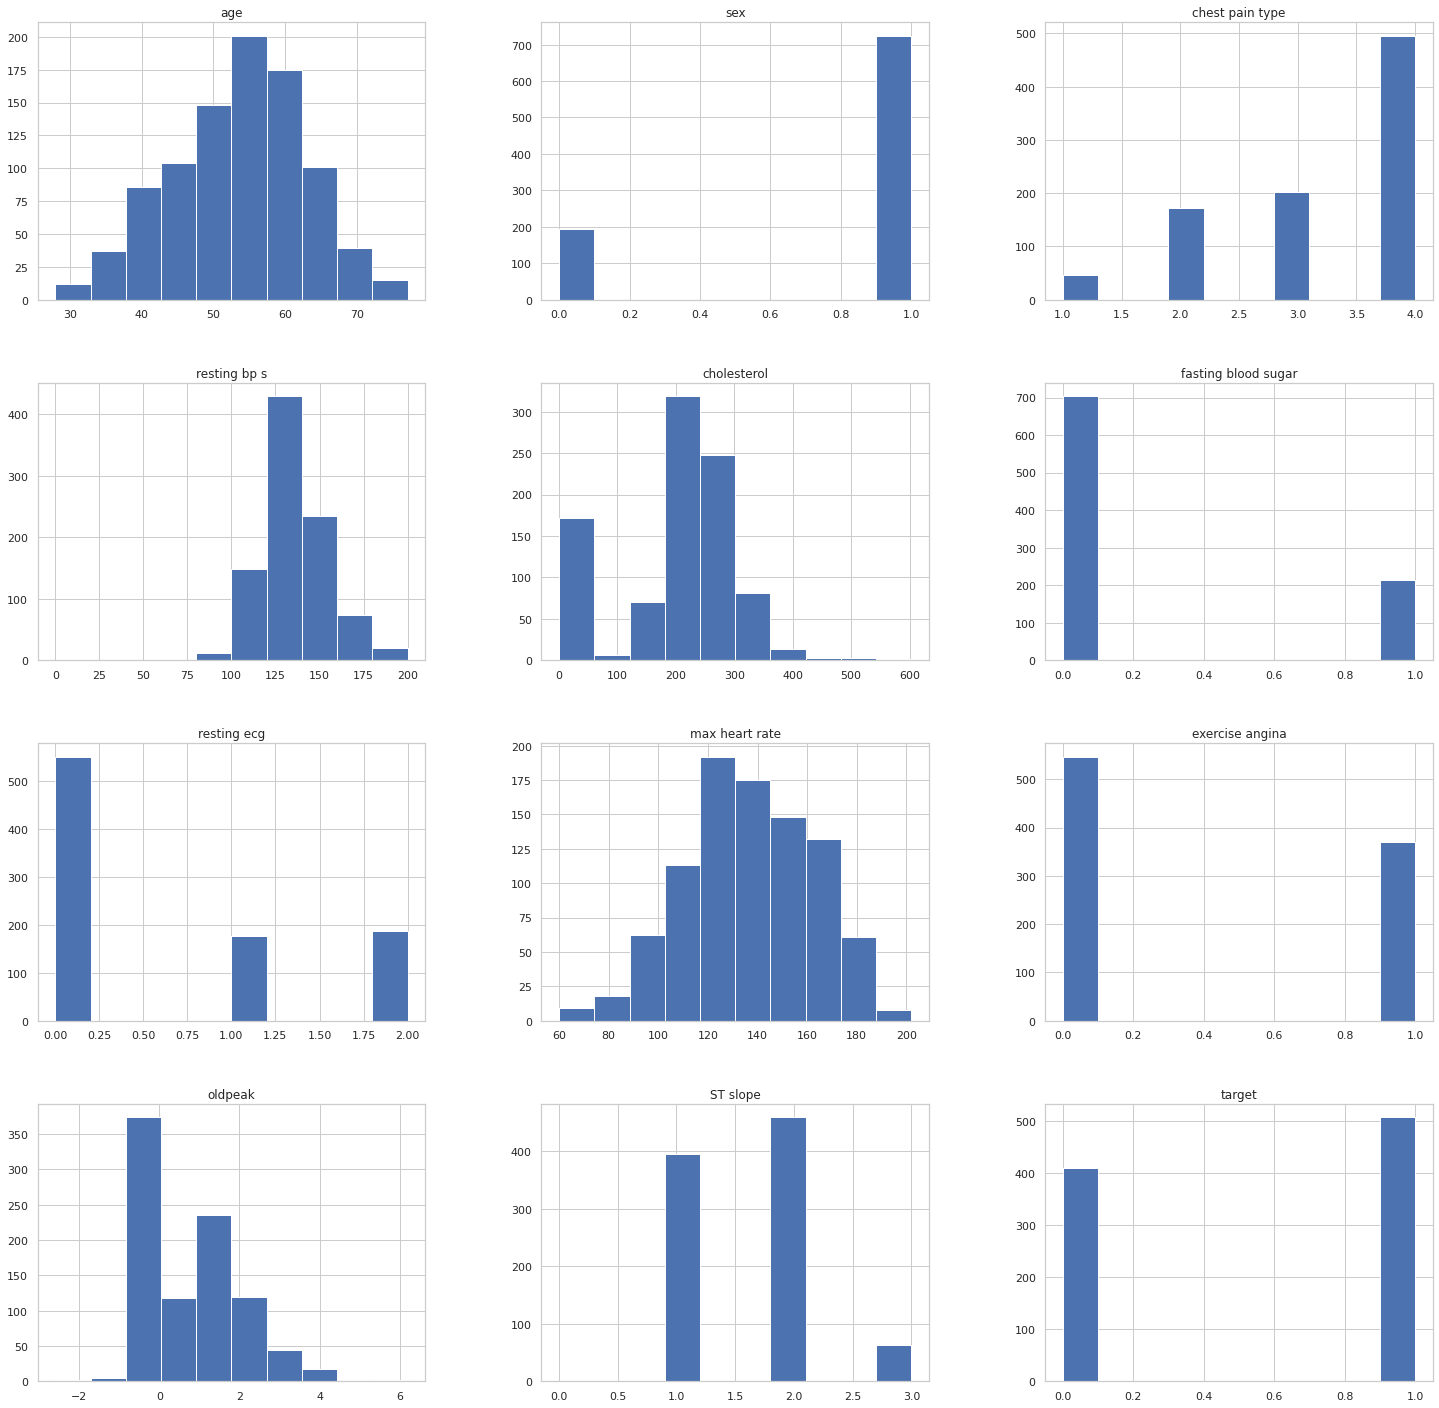

In [9]:
#Plot histograms or all given features
hist_plot = df.hist(figsize = (25,25))
plt.show()

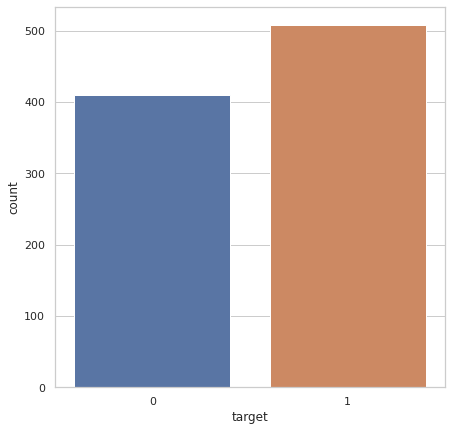

In [10]:
#Plot histogram of target variable - low or high chances of heart attack
plt.rcParams['figure.figsize'] = (7,7)
sns.countplot(df['target'])
ax = plt.gca()

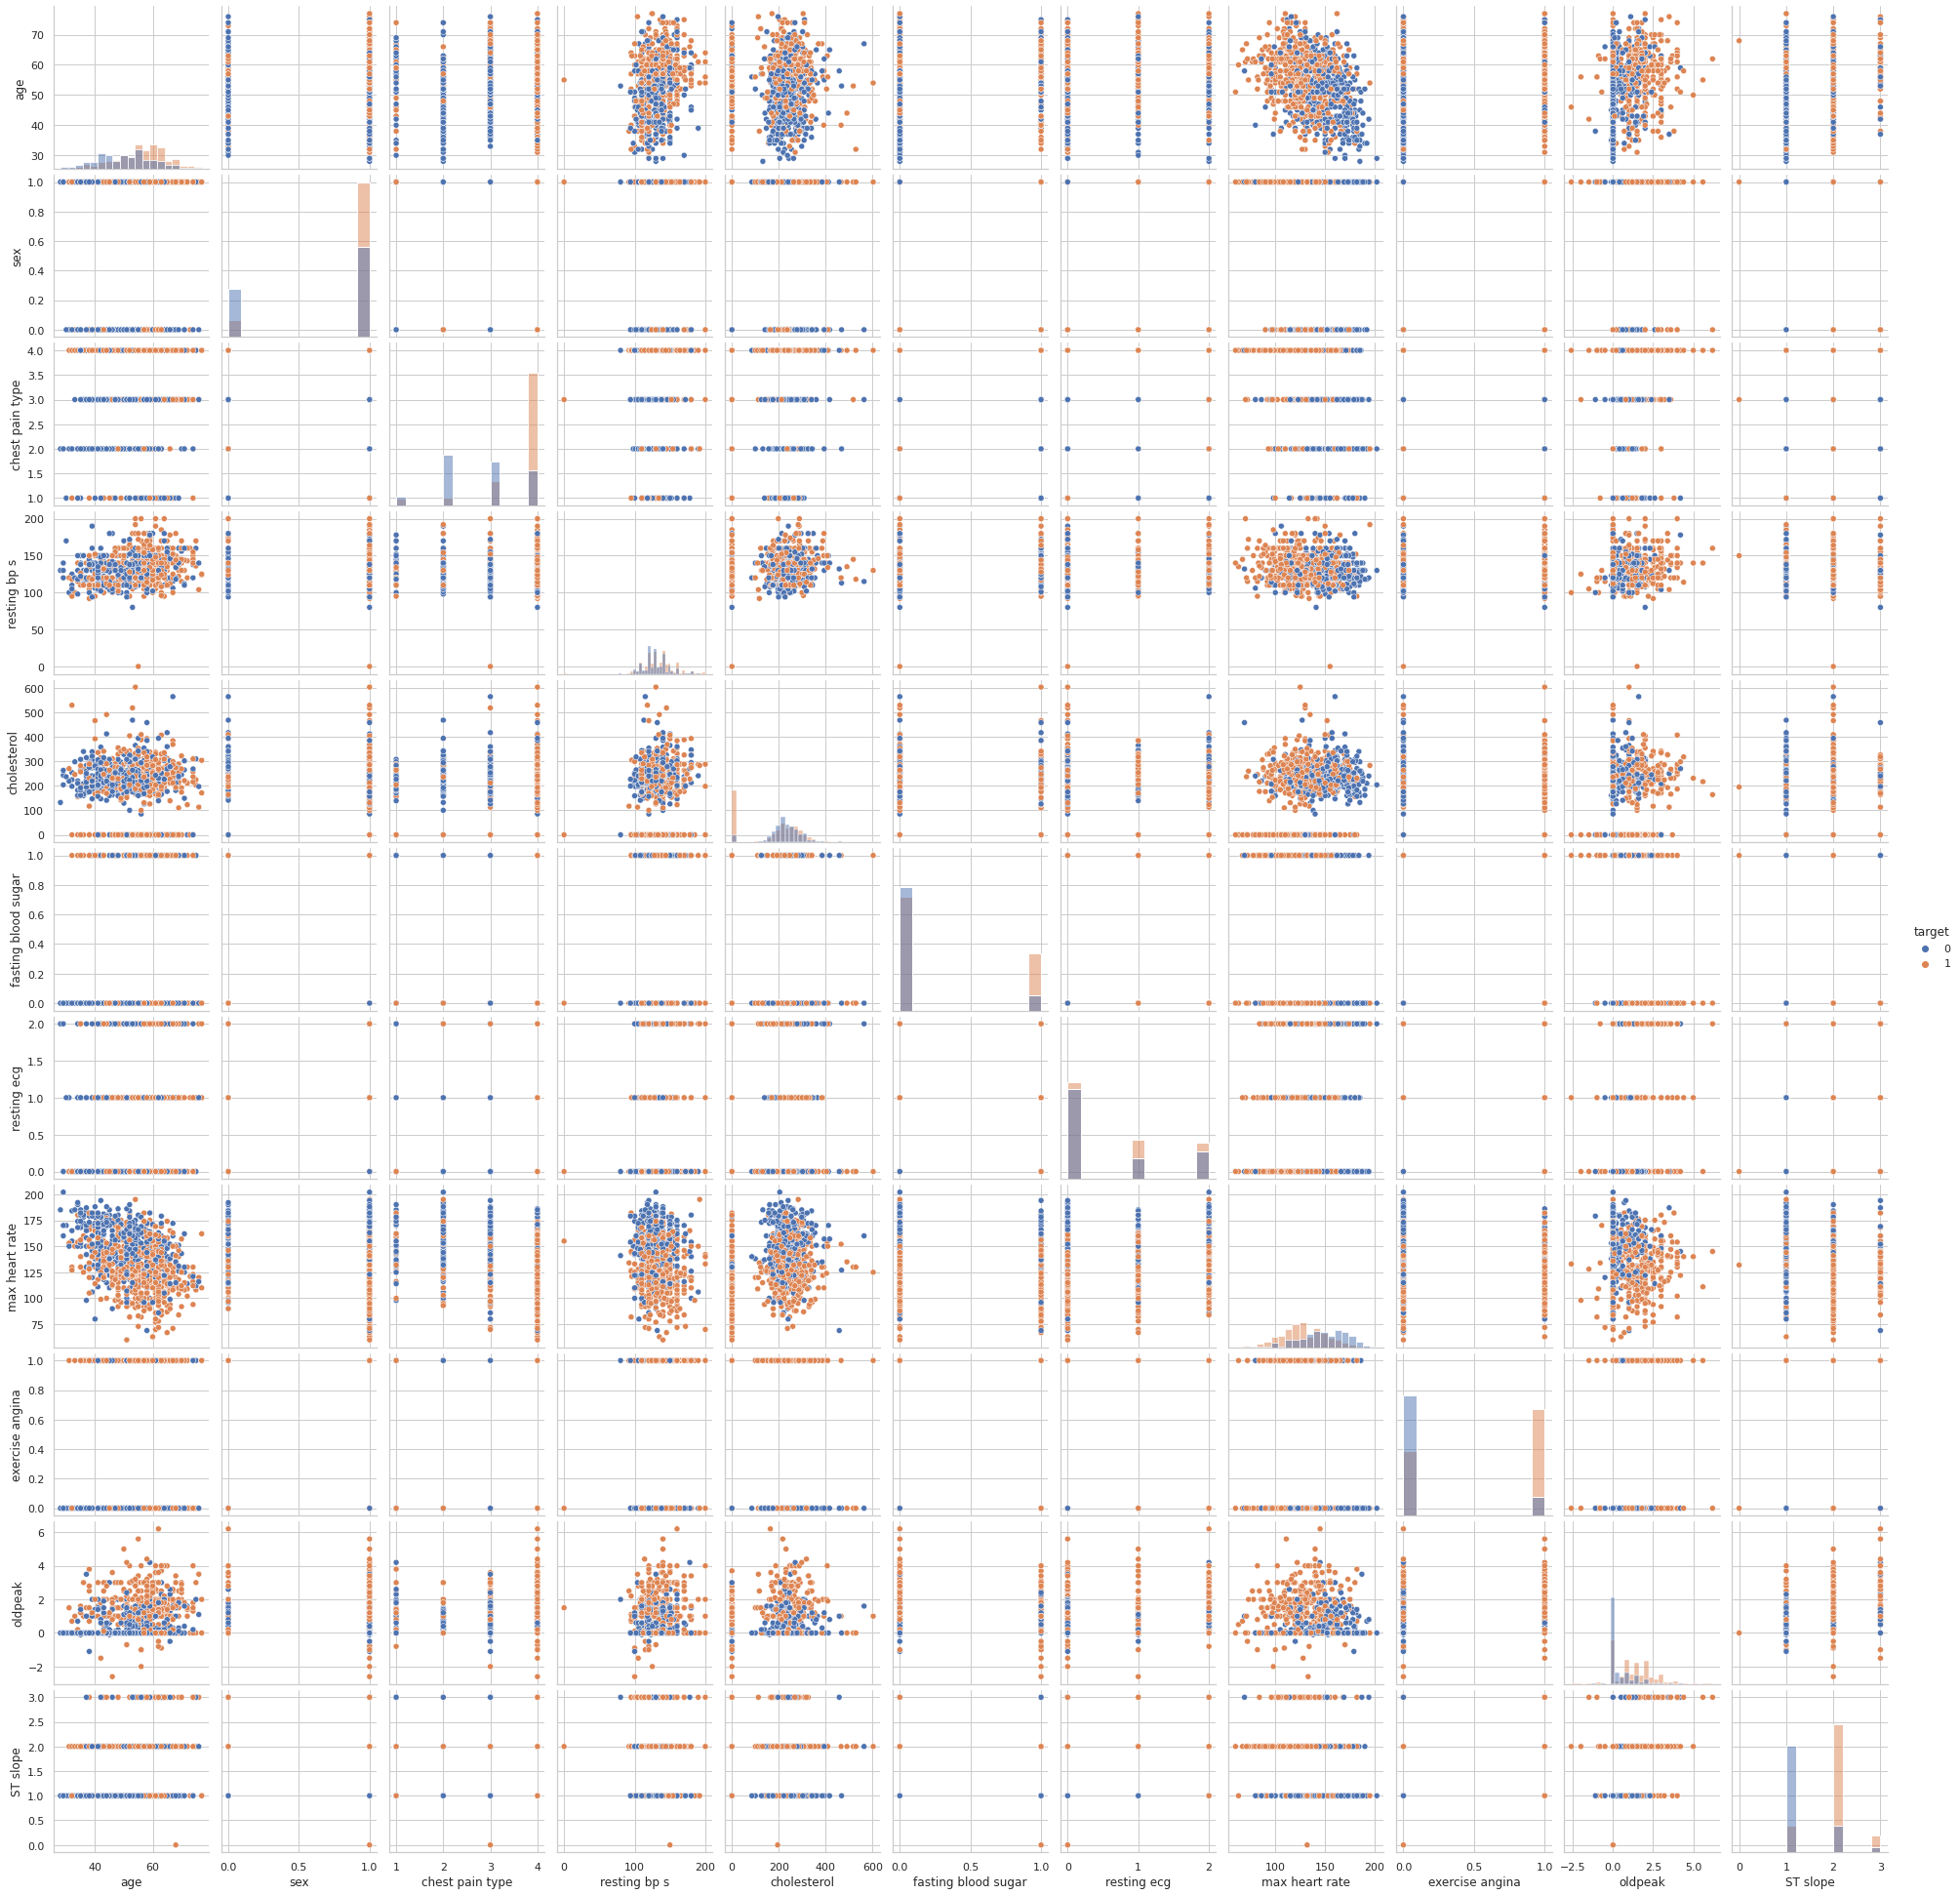

In [11]:
#Generate pairplot for data
plt.rcParams['figure.figsize'] = (20,20)
sns.pairplot(data=df, hue='target',diag_kind='hist')

<AxesSubplot:>

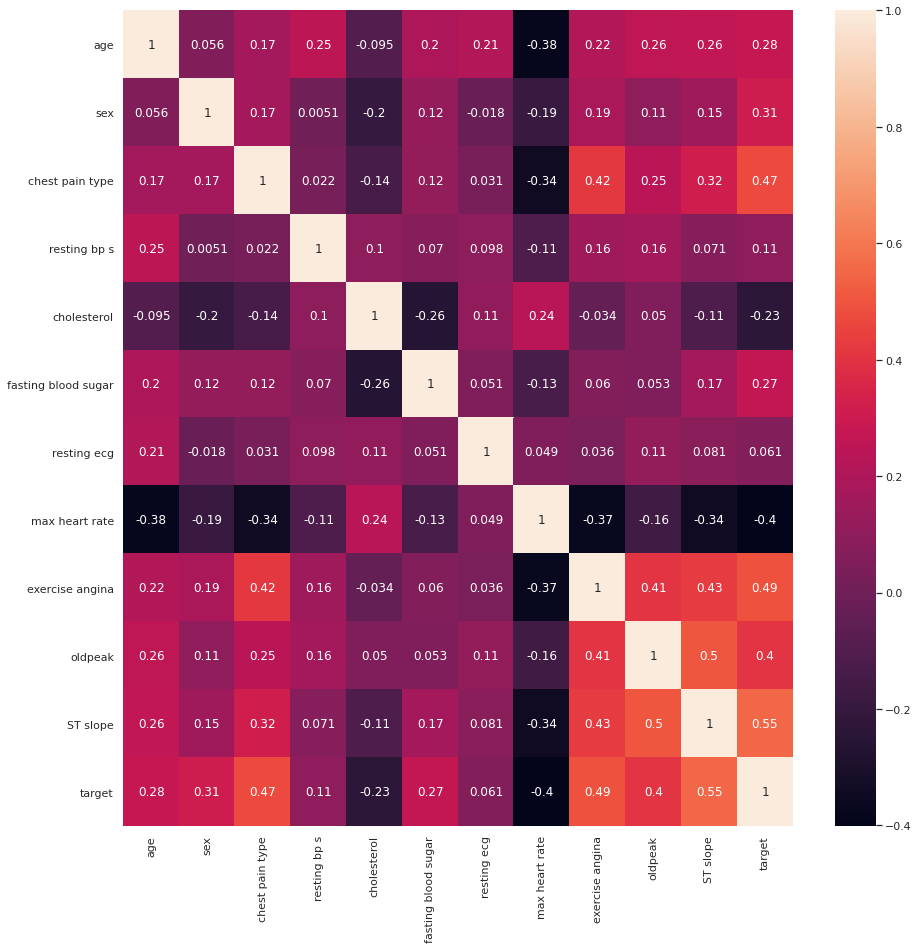

In [12]:
#Plot heatmap to determine correlation between features
ax=plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)

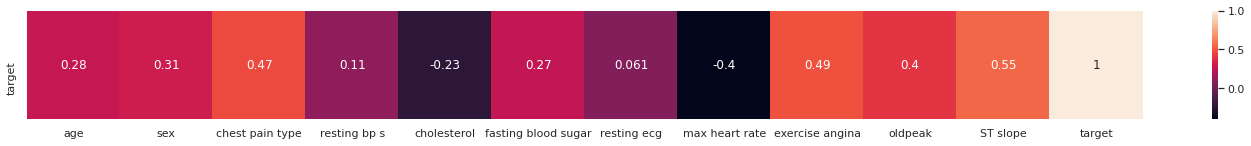

In [13]:
#Get correlation of all features to target variable specifically
ax=plt.subplots(figsize=(25,2))
sns.heatmap(df.corr().sort_values(by=["target"], ascending=False).head(1),annot=True)
plt.show()

From this we can see that ST slope has the largest and most positively correlated feature with the target variable, and resting ecg has the least absolute correlation value with it.

# Process Data

Now we will process the data to use it in all of our ML models. This requires doing:
1. Split data into X (feature data) and y (target variable) 
2. Scaling data (using standard scaler)
3. Splitting our X and y into their respective training and testing sets (70-30 split)

In [14]:
#Split data into X and y
X_raw = df.drop('target', axis=1)
y = df['target']

In [15]:
#Scale X data
scale_X = StandardScaler()
col_names = list(df.columns)
col_names.remove('target')
X = pd.DataFrame(scale_X.fit_transform(X_raw), columns = col_names)

In [16]:
#Preview scaled data
X.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
0,-1.433140,0.515952,-1.345086,0.410909,0.825070,-0.551341,-0.749180,1.382928,-0.823556,-0.832432,-1.044591
1,-0.478484,-1.938163,-0.270422,1.491752,-0.171961,-0.551341,-0.749180,0.754157,-0.823556,0.105664,0.597420
2,-1.751359,0.515952,-1.345086,-0.129513,0.770188,-0.551341,0.492241,-1.525138,-0.823556,-0.832432,-1.044591
3,-0.584556,-1.938163,0.804242,0.302825,0.139040,-0.551341,-0.749180,-1.132156,1.214246,0.574711,0.597420
4,0.051881,0.515952,-0.270422,0.951331,-0.034755,-0.551341,-0.749180,-0.581981,-0.823556,-0.832432,-1.044591


In [17]:
#Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Develop and Train ML Models

The classification models used will be:
1. Logistic Regression
2. Decision Tree
3. Random Forest    

## 1. Logistic Regression Classifier

In [25]:
#Define models and parameters for gridsearch
log_reg = LogisticRegression(random_state=0)
solvers = ['newton-cg','lbfgs','liblinear','sag','saga']
penalty = ['l1','l2','elasticnet','none']
C = [100, 50, 10, 1.0, 0.1, 0.01, 0.001]

#Define grid search
grid = dict(solver=solvers,penalty=penalty,C=C)
cv = RepeatedStratifiedKFold(n_splits=20, n_repeats=5, random_state=1)
grid_search = GridSearchCV(estimator=log_reg, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

In [26]:
grid_result = grid_search.fit(X_train, y_train)

In [27]:
#Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best score: 0.854555 using {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}


In [29]:
#Create logistic regression classifer object with gridsearch results
log_reg = LogisticRegression(C=0.1, penalty='l1', solver='saga',random_state=0)

#Train classifier model
log_reg.fit(X_train, y_train)

LogisticRegression(C=0.1, penalty='l1', random_state=0, solver='saga')

## 2. Decision Tree Classifier

In [32]:
#Define model and parameters for gridsearch
dt_clf = DecisionTreeClassifier(random_state=0)
criterion = ['gini','entropy']
splitter = ['best','random']
max_depth = [3,4,5,6]
min_samples_split = [2,3,4]
max_features = ['auto','sqrt', 'log2']

#Define grid search
grid = dict(criterion=criterion,splitter=splitter,max_depth=max_depth,min_samples_split=min_samples_split,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=20, n_repeats=5, random_state=1)
grid_search = GridSearchCV(estimator=dt_clf, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

In [33]:
grid_result = grid_search.fit(X_train, y_train)

In [34]:
#Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.853286 using {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'min_samples_split': 2, 'splitter': 'best'}


In [35]:
#Create decision tree classifer object with gridsearch results
dt_clf = DecisionTreeClassifier(criterion='gini',max_depth=4,max_features='auto',min_samples_split=2, 
                                splitter='best',random_state=0)

#Train classifier model
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, max_features='auto', random_state=0)

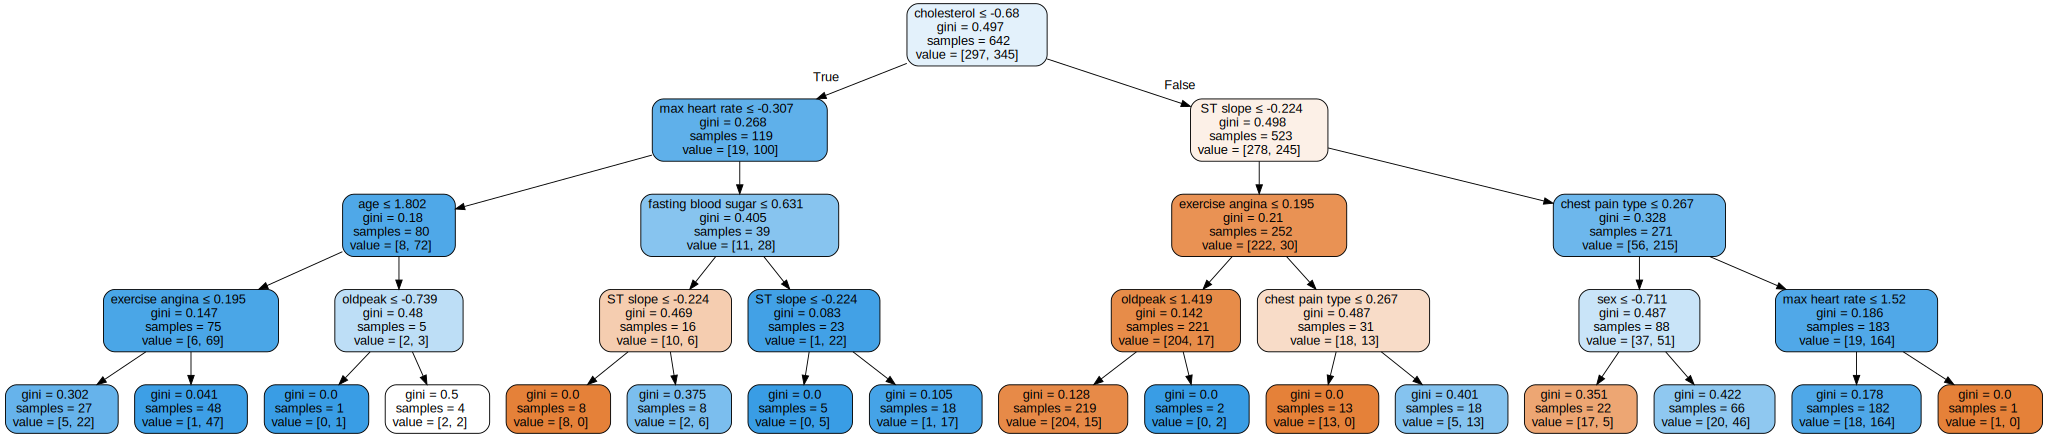

In [42]:
#Visualize optimal decision tree
fitted_tree = tree.DecisionTreeRegressor(max_depth=4).fit(X_train,y_train)
tree_graph = tree.export_graphviz(dt_clf, out_file=None, feature_names=col_names, filled=True,
                                  rounded=True,special_characters=True)
img = graphviz.Source(tree_graph)
display(img)

## 3. Random Forest Classifier

In [44]:
#Define model and parameters for gridsearch
rf_clf = RandomForestClassifier(random_state=0)
n_estimators = [100,150,200]
max_features = ['sqrt', 'log2']
bootstrap = [True]
max_depth = [50,60,70]

#Define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features,bootstrap=bootstrap,max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=20, n_repeats=5, random_state=1)
grid_search = GridSearchCV(estimator=rf_clf, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

In [45]:
grid_result = grid_search.fit(X_train, y_train)

In [46]:
#Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.866042 using {'bootstrap': True, 'max_depth': 50, 'max_features': 'sqrt', 'n_estimators': 100}


In [47]:
# Create random forest classifer object with gridsearch results
rf_clf = RandomForestClassifier(bootstrap=True, max_depth=50, max_features='sqrt',n_estimators=100,random_state=0)
#Train classifier model
rf_clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=50, max_features='sqrt', random_state=0)

# Test and Evaluate ML Models

The evaluation methods used will be:
1. Confusion Matrix
2. Accuracy Rate
3. Classification Report (Precision, Recall and F1-Score)
4. ROC AUC

In [48]:
#Run prediction using each classifier on same test data
y_pred_lrc = log_reg.predict(X_test)
y_pred_dtc = dt_clf.predict(X_test)
y_pred_rfc = rf_clf.predict(X_test)

In [49]:
#Compile final predictions from all models
pred_model_names = ["Logistic Regression Model","Decision Tree Model","Random Forest Model"]
y_pred_list = [y_pred_lrc,y_pred_dtc,y_pred_rfc]
classifiers_list = [log_reg,dt_clf,rf_clf]

In [50]:
#Evaluate classifier predictions using confusion matrix
print("="*30)
for idx, y_pred in enumerate(y_pred_list):
    print(pred_model_names[idx])
    #i += 1
    print("Confusion Matrix: \n", confusion_matrix(y_test,y_pred))
    print("="*30)

Logistic Regression Model
Confusion Matrix: 
 [[ 88  25]
 [ 18 145]]
Decision Tree Model
Confusion Matrix: 
 [[ 86  27]
 [ 15 148]]
Random Forest Model
Confusion Matrix: 
 [[ 92  21]
 [ 19 144]]


In [51]:
#Evaluate classifier predictions using accuracy score
print("="*40)
for idx, y_pred in enumerate(y_pred_list):
    print(pred_model_names[idx])
    print('Accuracy Score:',accuracy_score(y_test,y_pred))
    print("="*40)

Logistic Regression Model
Accuracy Score: 0.8442028985507246
Decision Tree Model
Accuracy Score: 0.8478260869565217
Random Forest Model
Accuracy Score: 0.855072463768116


In [52]:
#Evaluate classifier predictions using classification report
print("="*60)
for idx, y_pred in enumerate(y_pred_list):
    print(pred_model_names[idx])
    print("Classification Report: \n", classification_report(y_test,y_pred))
    print("="*60)

Logistic Regression Model
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.78      0.80       113
           1       0.85      0.89      0.87       163

    accuracy                           0.84       276
   macro avg       0.84      0.83      0.84       276
weighted avg       0.84      0.84      0.84       276

Decision Tree Model
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.76      0.80       113
           1       0.85      0.91      0.88       163

    accuracy                           0.85       276
   macro avg       0.85      0.83      0.84       276
weighted avg       0.85      0.85      0.85       276

Random Forest Model
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.81      0.82       113
           1       0.87      0.88      0.88       163

    accuracy                           0.

Logistic Regression Model AUC : 0.834165807047071
Decision Tree Model AUC : 0.8345187035126771
Random Forest Model AUC : 0.8487974374287419


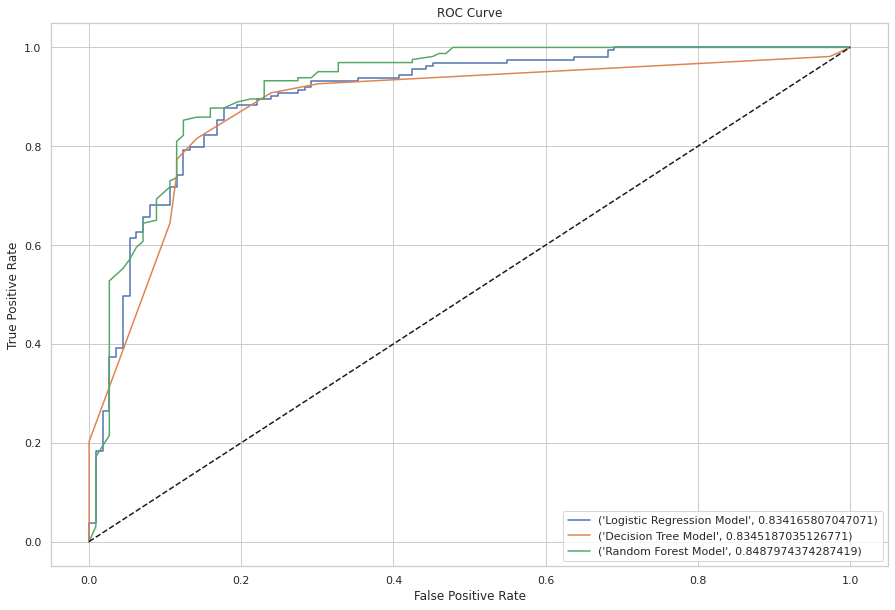

In [53]:
#Evaluate classifier predictions using ROC AUC
#Plot all ROC curves together for comparison
plt.figure(figsize=(15,10))
for idx, clf in enumerate(classifiers_list):
    predicted_probs = clf.predict_proba(X_test)
    predicted_prob1 = predicted_probs[:, 1]
    fpr, tpr, _ = roc_curve(y_test, predicted_prob1)
    auc = roc_auc_score(y_test,clf.predict(X_test))
    clf_name = pred_model_names[idx]
    print(clf_name,"AUC :",auc)
    plt.plot(fpr, tpr,label=(clf_name,auc))
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

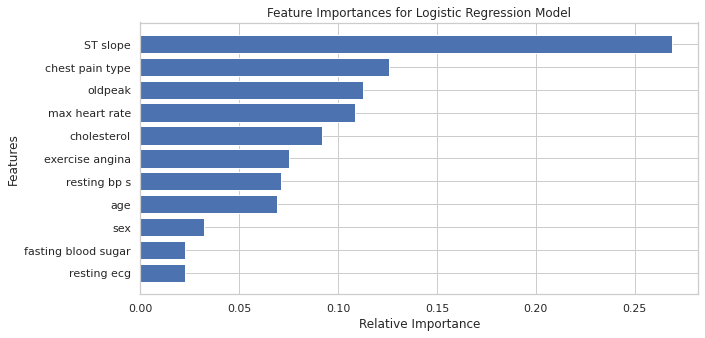

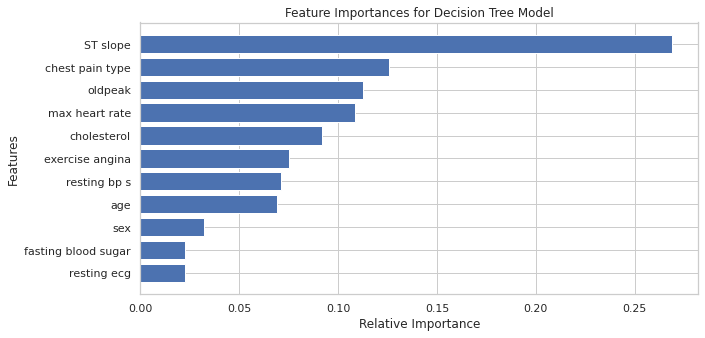

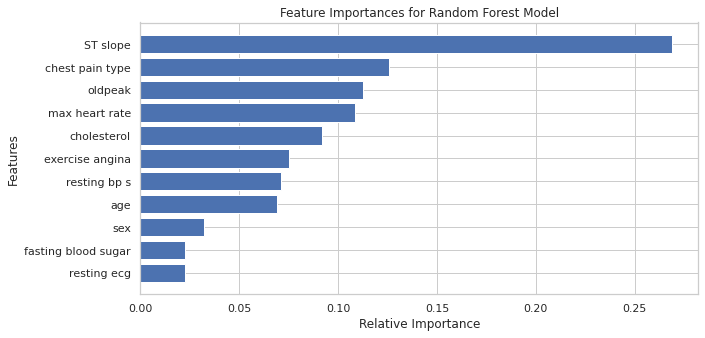

In [54]:
#Get feature importance for each model
for idx, clf in enumerate(classifiers_list):
    features = col_names
    importances = rf_clf.feature_importances_
    indices = np.argsort(importances)

    fig, ax = plt.subplots(figsize = (10,5))
    ax.barh(range(len(indices)), importances[indices])
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.ylabel('Features')
    title = ('Feature Importances for '+pred_model_names[idx])
    plt.title(title)
    plt.show()

# Conclusion

* Based on all of the evaluations done, we can see that the three models are comparable in performance. When looking at the evaluation metrics, we see that there is very little difference between the best and worst model. 
* Additionally, we found that the most significant factor in predicting heart disease is ST slope, with the least important being resting ecg, which aligns with what we saw in how the features correlated to the target variable. 